In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Scraper_Interview')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/Scraper_Interview'

In [2]:
!pip install google-play-scraper

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-0.2.1-cp37-none-any.whl size=22199 sha256=cfc99a5c09efc0d13514881cacd2c605bdb5c08e528e020170ee540bdb24c0d7
  Stored in directory: /root/.cache/pip/wheels/9a/fe/59/aaed9c7885041da68908f5e45f2796bf77696ac83874afd02c
Successfully built google-play-scraper


In [29]:
from google_play_scraper import Sort, reviews_all
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [30]:
#Because of the Google Play Store limit (up to 200 reviews can be fetched at a time), http requests are generated as long as the number of app reviews is divided by 200. 
#For example, targeting an app like Zomato makes tens of thousands of http requests.

In [31]:
result = reviews_all(
    'com.application.zomato',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with=None # defaults to None(means all score)
)
df = pd.DataFrame(result)[['userName','content','score']]
df.columns = ['User Name','Review','Rating']

df.set_index('User Name',inplace = True)
df

,Review,Rating
User Name,,
Mohammed,"I like the pro version, overall no complaints ...",4
Ruchi Lathoria,My experience with Zomato has been consistentl...,1
Vignesh Waran,Worst experience in terms of app. I have recei...,1
Ishani Mehta,It's an amazing app and I've not had any issue...,4
ALL ABOUT LIFE,WORST FOOD DELIVERY APP EVER. I WONDER THAT HO...,1
...,...,...
Ankit Chandra,"Bad service, order delayed multiple instances.",1
Dinesh Puri,Service is improved a bit.,3
Anuj Gupta,"Worse app, offer can't be applied, fail to man...",1


In [32]:
df_highest_rated = df[df['Rating'] == 5]
df_highest_rated.head()

,Review,Rating
User Name,,
Riti Adrija,"I love this app. I get reliable reviews, can s...",5
Najla Shaikh,Without doubt more reliable and responsive tha...,5
Vanshika Cheedella,"Amazing app, with fast delivery services. I al...",5
BIJOUX FERNS,The App is good the service is good but until ...,5
Havovi Patel,Good app to order food. Though it would help i...,5


In [33]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_highest_rated['Review']:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

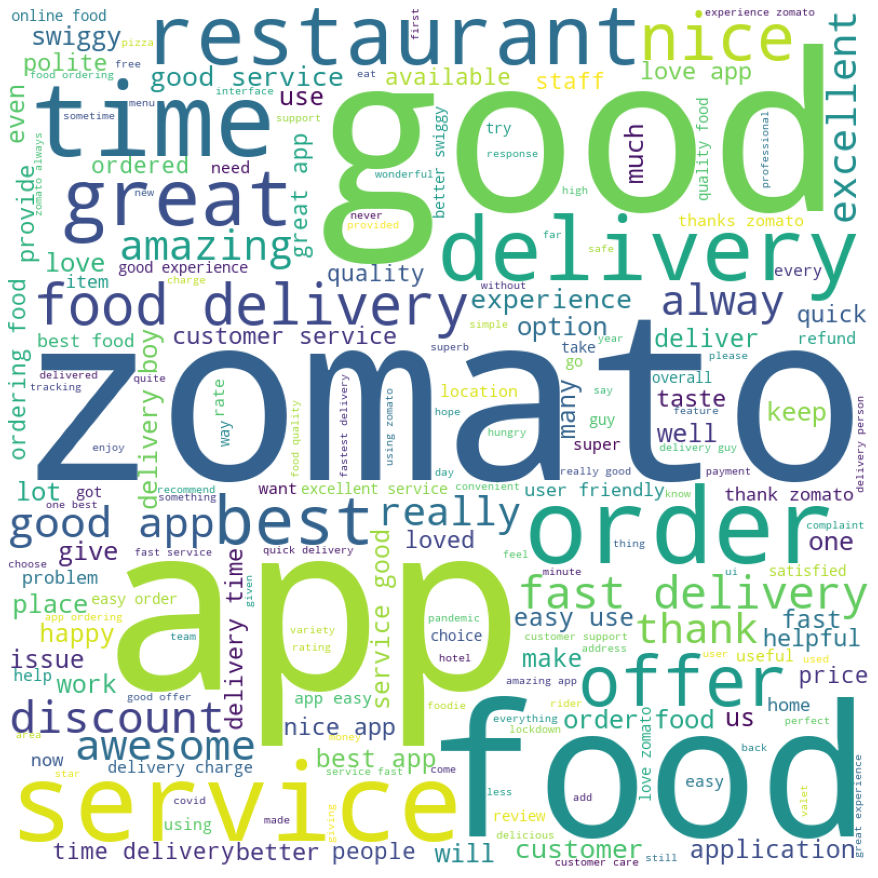

In [34]:
# plot the WordCloud image                       
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [35]:
df_lowest_rated = df[df['Rating'] == 1]
df_lowest_rated.head()

,Review,Rating
User Name,,
Ruchi Lathoria,My experience with Zomato has been consistentl...,1
Vignesh Waran,Worst experience in terms of app. I have recei...,1
ALL ABOUT LIFE,WORST FOOD DELIVERY APP EVER. I WONDER THAT HO...,1
Harshitha J. M,This is such a bad app !! It'll have problem a...,1
Prosenjit Mondal,I take back the good stuff I said. Last night ...,1


In [36]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_lowest_rated['Review']:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

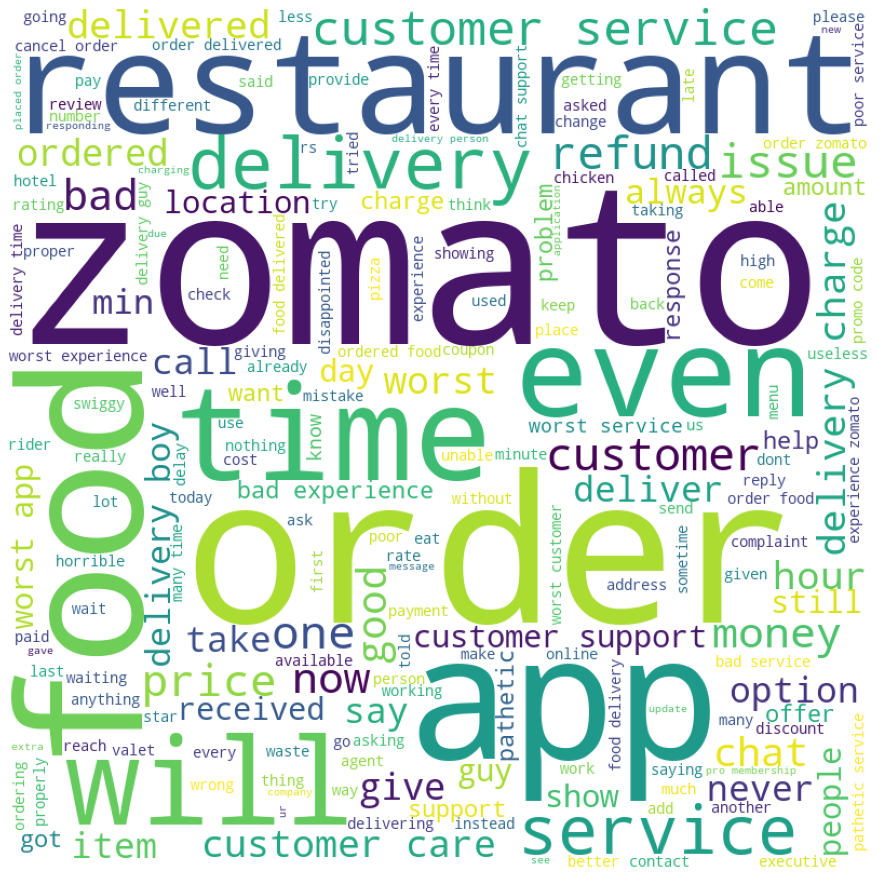

In [37]:
# plot the WordCloud image                       
plt.figure(figsize = (12, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()